In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import pyfiglet as pyf
print(pyf.figlet_format('Kelompok - 12'))
print(pyf.figlet_format('---------'))
print(pyf.figlet_format('RUMUSAN MASALAH'))


print('''1. Bagaimana hubungan antara target dengan jumlah pendapatan di wilayah Surabaya dengan Pacitan?
2. Apakah terdapat korelasi antara jumlah pendapatan dan jumlah kekurangan?
3. Bagaimana Hubungan Antara Inflasi Pajak dengan Jumlah Pendapatan? Apakah ada korelasi diantara keduanya?
4. Bagaimana cara mengidentifikasi kolom-kolom yang memiliki nilai yang Missing Value dan Outliers dalam dataset ini?
5. Bagaimana Reshaping Data digunakan dalam memperoleh pemahaman capaian penerimaan pajak dari data tersebut? Bagaimana Capaian Pajak Tersebut?
6. Bagaimana Mengubah Data Kategorik menjadi bentuk yang mendukung untuk analisis data pajak tersebut?''')

print(pyf.figlet_format('-----------'))

 _  __    _                             _              _ ____  
| |/ /___| | ___  _ __ ___  _ __   ___ | | __         / |___ \ 
| ' // _ \ |/ _ \| '_ ` _ \| '_ \ / _ \| |/ /  _____  | | __) |
| . \  __/ | (_) | | | | | | |_) | (_) |   <  |_____| | |/ __/ 
|_|\_\___|_|\___/|_| |_| |_| .__/ \___/|_|\_\         |_|_____|
                           |_|                                 

                                                       
                                                       
 _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                       
                                                       

 ____  _   _ __  __ _   _ ____    _    _   _ 
|  _ \| | | |  \/  | | | / ___|  / \  | \ | |
| |_) | | | | |\/| | | | \___ \ / _ \ |  \| |
|  _ <| |_| | |  | | |_| |___) / ___ \| |\  |
|_| \_\\___/|_|  |_|\___/|____/_/   \_\_| \_|
                                             
 _

In [3]:
data_pajak = pd.read_excel('Jumlah Penerimaan Pajak di Jawa Timur oktober-desember.xlsx')
data_pajak

,periode_update,upt,label,skt,target,harilalu,jumlah,prosen,hrini,kurang,capaian pendapatan,Wilayah,inflasi
0,Oktober 2022,SURABAYA BARAT,Pajak Kendaraan Bermotor,PKB,406100000000,365277390060,366161247410,9017,883857350,39938752590,90.165291,SURABAYA,-99.758031
1,Oktober 2022,SURABAYA BARAT,Bea Balik Nama Kendaraan Bermotor,BBNKB,235400000000,237327905000,238173905000,10118,846000000,-2773905000,101.178379,SURABAYA,-99.643531
2,Oktober 2022,SURABAYA BARAT,Pajak Air Permukaan,PAP,53400000,51362450,51362450,0,0,2037550,96.184363,SURABAYA,-100.000000
3,Oktober 2022,SURABAYA BARAT,Retribusi Jasa Usaha,RJU,147000000,128278000,128278000,0,0,18722000,87.263946,SURABAYA,-100.000000
4,Oktober 2022,SURABAYA TIMUR,Pajak Kendaraan Bermotor,PKB,462300000000,409289289421,410354046371,8876,1064756950,51945953629,88.763583,SURABAYA,-99.739852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Desember 2022,BANGKALAN,Retribusi Jasa Usaha,RJU,18000000,34140400,34140400,0,0,-16140400,189.668889,MADURA,-100.000000
500,Desember 2022,SUMENEP,Pajak Kendaraan Bermotor,PKB,57500000000,64938488525,64938488525,11294,0,-7438488525,112.936502,MADURA,-100.000000
501,Desember 2022,SUMENEP,Bea Balik Nama Kendaraan Bermotor,BBNKB,34200000000,41723448500,41723448500,12200,0,-7523448500,121.998387,MADURA,-100.000000
502,Desember 2022,SUMENEP,Pajak Air Permukaan,PAP,22000000,26551200,26551200,0,0,-4551200,120.687273,MADURA,-100.000000


In [4]:
data_pajak.isnull().sum()

periode_update        0
upt                   0
label                 0
skt                   0
target                0
harilalu              0
jumlah                0
prosen                0
hrini                 0
kurang                0
capaian pendapatan    0
Wilayah               0
inflasi               0
dtype: int64

In [5]:
missing_percentage = data_pajak.isnull().mean() * 100
missing_percentage

periode_update        0.0
upt                   0.0
label                 0.0
skt                   0.0
target                0.0
harilalu              0.0
jumlah                0.0
prosen                0.0
hrini                 0.0
kurang                0.0
capaian pendapatan    0.0
Wilayah               0.0
inflasi               0.0
dtype: float64

## 1. Bagaimana hubungan antara target dengan jumlah pendapatan di wilayah Surabaya dengan Pacitan?

In [6]:
df = data_pajak.copy()

In [7]:
df_wilayah = df['Wilayah'].unique()

target = []
jumlah = []

for wilayah in df_wilayah:
    data = df[df['Wilayah'] == wilayah]
    target.append(data['target'].sum())
    jumlah.append(data['jumlah'].sum())

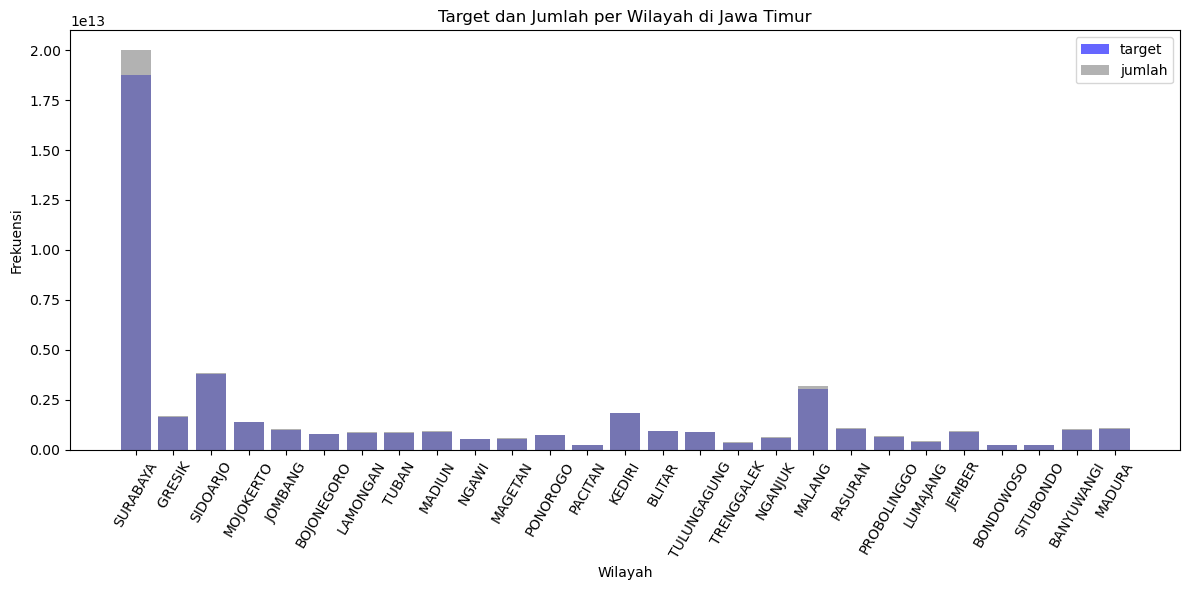

In [8]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_wilayah, target, label='target', alpha=0.6, color = 'blue')
plt.bar(df_wilayah, jumlah, label='jumlah', alpha=0.6, color = 'grey')

# Menambahkan label dan legenda
plt.xlabel('Wilayah')
plt.ylabel('Frekuensi')
plt.title('Target dan Jumlah per Wilayah di Jawa Timur')
plt.legend()

# Menampilkan grafik
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Wilayah Surabaya 

In [9]:
filt_sby = df[df['Wilayah'].str.contains('SURABAYA')]
filt_sby

,periode_update,upt,label,skt,target,harilalu,jumlah,prosen,hrini,kurang,capaian pendapatan,Wilayah,inflasi
0,Oktober 2022,SURABAYA BARAT,Pajak Kendaraan Bermotor,PKB,406100000000,365277390060,366161247410,9017,883857350,39938752590,90.165291,SURABAYA,-99.758031
1,Oktober 2022,SURABAYA BARAT,Bea Balik Nama Kendaraan Bermotor,BBNKB,235400000000,237327905000,238173905000,10118,846000000,-2773905000,101.178379,SURABAYA,-99.643531
2,Oktober 2022,SURABAYA BARAT,Pajak Air Permukaan,PAP,53400000,51362450,51362450,0,0,2037550,96.184363,SURABAYA,-100.000000
3,Oktober 2022,SURABAYA BARAT,Retribusi Jasa Usaha,RJU,147000000,128278000,128278000,0,0,18722000,87.263946,SURABAYA,-100.000000
4,Oktober 2022,SURABAYA TIMUR,Pajak Kendaraan Bermotor,PKB,462300000000,409289289421,410354046371,8876,1064756950,51945953629,88.763583,SURABAYA,-99.739852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Desember 2022,SURABAYA SELATAN,Pajak Kendaraan Bermotor,PKB,400300000000,444491817782,444491817782,11104,0,-44191817782,111.039675,SURABAYA,-100.000000
375,Desember 2022,SURABAYA SELATAN,Bea Balik Nama Kendaraan Bermotor,BBNKB,227700000000,271327687300,271327687300,11916,0,-43627687300,119.160161,SURABAYA,-100.000000
376,Desember 2022,SURABAYA SELATAN,Pajak Bahan Bakar Kendaraan Bermotor,PBBKB,2068127000000,2667156709357,2667156709357,0,0,-599029709357,128.964842,SURABAYA,-100.000000
377,Desember 2022,SURABAYA SELATAN,Pajak Air Permukaan,PAP,2686000000,3854629300,3854629300,0,0,-1168629300,143.508165,SURABAYA,-100.000000


In [10]:
wil_sby = filt_sby.loc[:, ['jumlah', 'capaian pendapatan', 'target']]
wil_sby

,jumlah,capaian pendapatan,target
0,366161247410,90.165291,406100000000
1,238173905000,101.178379,235400000000
2,51362450,96.184363,53400000
3,128278000,87.263946,147000000
4,410354046371,88.763583,462300000000
...,...,...,...
374,444491817782,111.039675,400300000000
375,271327687300,119.160161,227700000000
376,2667156709357,128.964842,2068127000000
377,3854629300,143.508165,2686000000


In [11]:
wil_sby.corr()

,jumlah,capaian pendapatan,target
jumlah,1.000000,-0.039435,0.993182
capaian pendapatan,-0.039435,1.000000,-0.090559
target,0.993182,-0.090559,1.000000


In [12]:
pearson_corr = wil_sby['jumlah'].corr(wil_sby['target'])
print(f' Pearson Correlationnya adalah: {pearson_corr:.2f}')

 Pearson Correlationnya adalah: 0.99


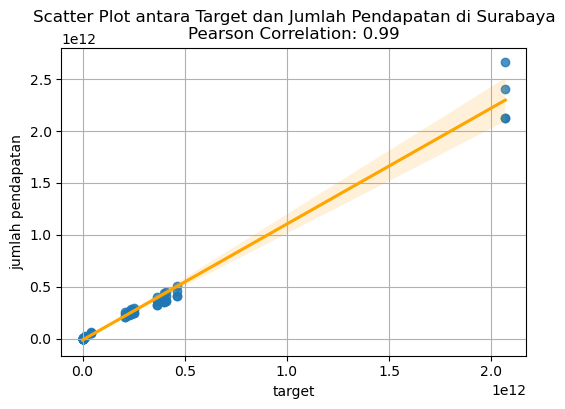

In [13]:
# Scatter plot dengan garis regresi linear
plt.figure(figsize=(6, 4))
sns.regplot(x='target', y='jumlah', data=wil_sby,line_kws={'color': 'orange'})
plt.xlabel('target')
plt.ylabel('jumlah pendapatan')
plt.title(f'Scatter Plot antara Target dan Jumlah Pendapatan di Surabaya\nPearson Correlation: {pearson_corr:.2f}')
plt.grid(True)
plt.show()

### Interpretasi :
- Terdapat Korelasi dengan nilai 0,99 antara target pendapatan pajak dan jumlah pendapatan di Wilayah Surabaya. Hal menunjukkan bahwa terdapat hubungan yang sangat kuat dan positif antara kedua variabel tersebut di Wilayah Surabaya. Artinya, jika target pendapatan pajak di Surabaya meningkat, maka jumlah pendapatan juga akan meningkat. 

## Wilayah Pacitan 

In [14]:
filt_pacitan = df[df['Wilayah'].str.contains('PACITAN')]
filt_pacitan

,periode_update,upt,label,skt,target,harilalu,jumlah,prosen,hrini,kurang,capaian pendapatan,Wilayah,inflasi
64,Oktober 2022,PACITAN,Pajak Kendaraan Bermotor,PKB,42800000000,38337763860,38435190760,8980,97426900,4364809240,89.801848,PACITAN,-99.745872
65,Oktober 2022,PACITAN,Bea Balik Nama Kendaraan Bermotor,BBNKB,13900000000,13795922600,13795922600,9925,0,104077400,99.251242,PACITAN,-100.000000
66,Oktober 2022,PACITAN,Pajak Air Permukaan,PAP,16000000,15939600,15939600,0,0,60400,99.622500,PACITAN,-100.000000
67,Oktober 2022,PACITAN,Retribusi Jasa Usaha,RJU,28000000,27015000,27015000,0,0,985000,96.482143,PACITAN,-100.000000
208,November 2022,PACITAN,Pajak Kendaraan Bermotor,PKB,42800000000,38337763860,38435190760,8980,97426900,4364809240,89.801848,PACITAN,-99.745872
209,November 2022,PACITAN,Bea Balik Nama Kendaraan Bermotor,BBNKB,13900000000,13795922600,13795922600,9925,0,104077400,99.251242,PACITAN,-100.000000
210,November 2022,PACITAN,Pajak Air Permukaan,PAP,16000000,15939600,15939600,0,0,60400,99.622500,PACITAN,-100.000000
211,November 2022,PACITAN,Retribusi Jasa Usaha,RJU,28000000,27015000,27015000,0,0,985000,96.482143,PACITAN,-100.000000
280,November 2022,PACITAN,Pajak Kendaraan Bermotor,PKB,42800000000,42863794285,42948811985,10035,85017700,-148811985,100.347692,PACITAN,-99.801656
281,November 2022,PACITAN,Bea Balik Nama Kendaraan Bermotor,BBNKB,13900000000,15383347600,15387372600,11070,4025000,-1487372600,110.700522,PACITAN,-99.973835


In [15]:
wil_pacitan = filt_pacitan.loc[:, ['target', 'capaian pendapatan', 'jumlah']]
wil_pacitan

,target,capaian pendapatan,jumlah
64,42800000000,89.801848,38435190760
65,13900000000,99.251242,13795922600
66,16000000,99.622500,15939600
67,28000000,96.482143,27015000
208,42800000000,89.801848,38435190760
209,13900000000,99.251242,13795922600
210,16000000,99.622500,15939600
211,28000000,96.482143,27015000
280,42800000000,100.347692,42948811985
281,13900000000,110.700522,15387372600


In [16]:
pearson_corr = wil_pacitan['jumlah'].corr(wil_pacitan['target'])
pearson_corr

0.9919876971926617

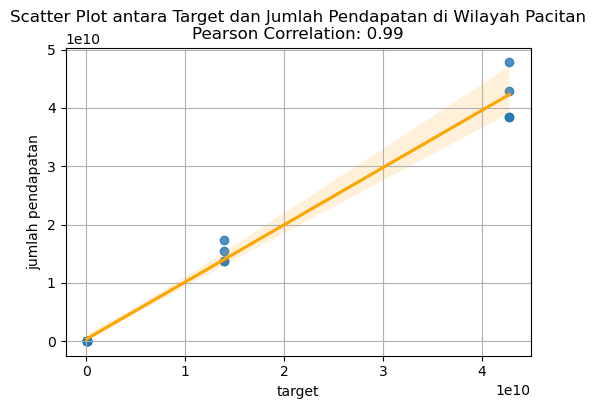

In [17]:
# Scatter plot dengan garis regresi linear
plt.figure(figsize=(6, 4))
sns.regplot(x='target', y='jumlah', data=wil_pacitan,line_kws={'color': 'orange'})
plt.xlabel('target')
plt.ylabel('jumlah pendapatan')
plt.title(f'Scatter Plot antara Target dan Jumlah Pendapatan di Wilayah Pacitan\nPearson Correlation: {pearson_corr:.2f}')
plt.grid(True)
plt.show()

## Interpretasi:
- Terdapat Korelasi dengan nilai 0,99 antara target pendapatan pajak dan jumlah pendapatan di Wilayah Pacitan. Hal menunjukkan bahwa terdapat hubungan yang sangat kuat dan positif antara kedua variabel tersebut di Wilayah Pacitan. Artinya, jika target pendapatan pajak di Pacitan meningkat, maka jumlah pendapatan juga akan meningkat

## Kesimpulan :
- Korelasi dengan nilai 0,99 antara pendapatan pajak dan jumlah pendapatan di dua wilayah yang berbeda. Hal menunjukkan bahwa terdapat hubungan yang sangat kuat dan positif antara kedua variabel tersebut di dua wilayah tersebut. Artinya, jika pendapatan pajak meningkat, maka jumlah pendapatan juga akan meningkat. 
- Perubahan dalam target pendapatan pajak hampir selalu diikuti oleh perubahan yang hampir serupa dalam jumlah pendapatan pajak yang sebenarnya. Ini menunjukkan bahwa pemerintah daerah telah berhasil dalam mencapai target pendapatan pajak yang ditetapkan.

# 2. Bagaimana hubungan antara jumlah pendapatan dan jumlah kekurangan di Jawa Timur?

In [18]:
df.corr()

,target,harilalu,jumlah,prosen,hrini,kurang,capaian pendapatan,inflasi
target,1.000000,0.992884,0.992968,0.256257,0.373400,-0.577857,-0.199315,-0.000789
harilalu,0.992884,1.000000,0.999999,0.236409,0.309802,-0.670935,-0.164436,-0.010977
jumlah,0.992968,0.999999,1.000000,0.236901,0.310975,-0.670410,-0.164877,-0.010753
prosen,0.256257,0.236409,0.236901,1.000000,0.452561,-0.027063,-0.375507,0.055013
hrini,0.373400,0.309802,0.310975,0.452561,1.000000,0.196492,-0.390449,0.169208
kurang,-0.577857,-0.670935,-0.670410,-0.027063,0.196492,1.000000,-0.112584,0.069182
capaian pendapatan,-0.199315,-0.164436,-0.164877,-0.375507,-0.390449,-0.112584,1.000000,-0.162918
inflasi,-0.000789,-0.010977,-0.010753,0.055013,0.169208,0.069182,-0.162918,1.000000


In [19]:
pearson_corr = df['kurang'].corr(df['jumlah'])
print(f' Pearson Correlationnya adalah: {pearson_corr:.2f}')

 Pearson Correlationnya adalah: -0.67


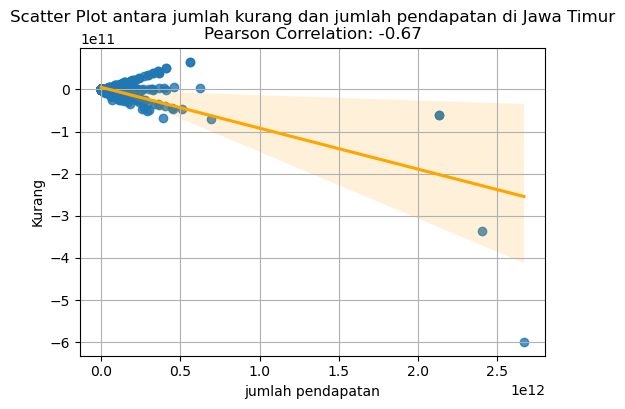

In [20]:
plt.figure(figsize=(6, 4))
nom1 = sns.regplot(data=df, y='kurang', x='jumlah', line_kws={'color': 'orange'})

# Memberi judul dan label sumbu
plt.title('Hubungan Antara jumlah pendapatan dan kurang')
plt.xlabel('jumlah pendapatan')
plt.ylabel('Kurang')
plt.title(f'Scatter Plot antara jumlah kurang dan jumlah pendapatan di Jawa Timur\nPearson Correlation: {pearson_corr:.2f}')

# Menampilkan grid untuk referensi
plt.grid(True)

# Menampilkan grafik
plt.show()

### Interpretasi :
- Pada Dua Variabel tersebut, mempunyai korelasi negatif dengan nilai -0,67. Ini menunjukkan bahwa terdapat hubungan negatif yang kuat antara kedua variabel tersebut. Artinya, semakin tinggi angka kekurangan penerimaan pajak, maka akan semakin rendah pula jumlah pendapatan pajak 

# 3. Bagaimana Hubungan Antara Inflasi Pajak dengan CAPAIAN Pendapatan Di jawa timur? apakah ada korelasi diantara keduanya?

In [21]:
df.corr()

,target,harilalu,jumlah,prosen,hrini,kurang,capaian pendapatan,inflasi
target,1.000000,0.992884,0.992968,0.256257,0.373400,-0.577857,-0.199315,-0.000789
harilalu,0.992884,1.000000,0.999999,0.236409,0.309802,-0.670935,-0.164436,-0.010977
jumlah,0.992968,0.999999,1.000000,0.236901,0.310975,-0.670410,-0.164877,-0.010753
prosen,0.256257,0.236409,0.236901,1.000000,0.452561,-0.027063,-0.375507,0.055013
hrini,0.373400,0.309802,0.310975,0.452561,1.000000,0.196492,-0.390449,0.169208
kurang,-0.577857,-0.670935,-0.670410,-0.027063,0.196492,1.000000,-0.112584,0.069182
capaian pendapatan,-0.199315,-0.164436,-0.164877,-0.375507,-0.390449,-0.112584,1.000000,-0.162918
inflasi,-0.000789,-0.010977,-0.010753,0.055013,0.169208,0.069182,-0.162918,1.000000


In [22]:
pearson_corr = df['inflasi'].corr(df['capaian pendapatan'])
print(f' Pearson Correlationnya adalah: {pearson_corr:.2f}')

 Pearson Correlationnya adalah: -0.16


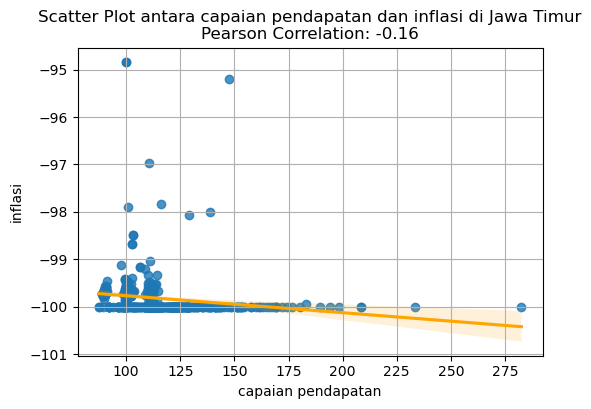

In [23]:
plt.figure(figsize=(6, 4))
nom1 = sns.regplot(data=df, y='inflasi', x='capaian pendapatan', line_kws={'color': 'orange'})

# Memberi judul dan label sumbu
plt.title('Hubungan Antara capaian pendapatan dan inflasi')
plt.xlabel('capaian pendapatan')
plt.ylabel('inflasi')
plt.title(f'Scatter Plot antara capaian pendapatan dan inflasi di Jawa Timur\nPearson Correlation: {pearson_corr:.2f}')

# Menampilkan grid untuk referensi
plt.grid(True)

# Menampilkan grafik
plt.show()

### INTERPRETASI :
- Hubungan antara Inflasi dengan Capaian Pendapatan mempunyai Hubungan Korelasi Negatif dengan nilai -0,13. Dalam hal ini,  menunjukkan bahwa terdapat hubungan kebalikan antara kedua variabel tersebut. 
- Saat tingkat inflasi naik, maka capaian pendapatan pajak cenderung menurun. Sebaliknya, jika tingkat inflasi turun, maka capaian pendapatan pajak cenderung meningkat.


# Kesimpulan dan Saran

### Kesimpulan
- Terdapat hubungan yang kuat antara pendapatan pajak dan jumlah pendapatan. Artinya, semakin tinggi pendapatan pajak, maka semakin tinggi pula jumlah pendapatan.
- Kekurangan penerimaan pajak memiliki pengaruh negatif terhadap pendapatan pajak. Artinya, semakin tinggi kekurangan penerimaan pajak, maka semakin rendah pula pendapatan pajak.
- Inflasi memiliki pengaruh negatif terhadap capaian pendapatan. Artinya, semakin tinggi inflasi, maka semakin rendah pula capaian pendapatan.


### Saran
- Meningkatkan Kepatuhan Wajib Pajak dengan cara memperkuat sistem pemungutan pajak 
- Meningkatkan kesadaran masyarakat tentang pentingnya membayar pajak dan kontribusi pajak terhadap pembangunan daerah 
- Menjaga stabilitas harga dan daya beli masyarakat dapat membantu dalam mendukung pendapatan pajak yang lebih stabil dan mencegah terjadinya inflasi


# Lab Ke-4 Missing Value

In [40]:
df = pd.read_excel('Missing Value_Jumlah Penerimaan Pajak Jawa Timur.xlsx')
df

,periode_update,upt,label,skt,target,harilalu,jumlah,hrini,kurang,prosen
0,Oktober 2022,SURABAYA BARAT,Pajak Kendaraan Bermotor,PKB,406100000000,365277390060,366161247410,8.838574e+08,39938752590,90.165291
1,Oktober 2022,SURABAYA BARAT,Bea Balik Nama Kendaraan Bermotor,BBNKB,235400000000,237327905000,238173905000,8.460000e+08,-2773905000,101.178379
2,Oktober 2022,SURABAYA BARAT,Pajak Air Permukaan,PAP,53400000,51362450,51362450,NaN,2037550,NaN
3,Oktober 2022,SURABAYA BARAT,Retribusi Jasa Usaha,RJU,147000000,128278000,128278000,NaN,18722000,NaN
4,Oktober 2022,SURABAYA TIMUR,Pajak Kendaraan Bermotor,PKB,462300000000,409289289421,410354046371,1.064757e+09,51945953629,88.763583
...,...,...,...,...,...,...,...,...,...,...
499,Desember 2022,BANGKALAN,Retribusi Jasa Usaha,RJU,18000000,34140400,34140400,NaN,-16140400,NaN
500,Desember 2022,SUMENEP,Pajak Kendaraan Bermotor,PKB,57500000000,64938488525,64938488525,NaN,-7438488525,112.936502
501,Desember 2022,SUMENEP,Bea Balik Nama Kendaraan Bermotor,BBNKB,34200000000,41723448500,41723448500,NaN,-7523448500,121.998387
502,Desember 2022,SUMENEP,Pajak Air Permukaan,PAP,22000000,26551200,26551200,NaN,-4551200,NaN


## 4. Bagaimana cara mengidentifikasi kolom-kolom yang memiliki nilai yang Missing Value dan Outliers dalam dataset ini? 

In [25]:
df.isnull().sum()

periode_update      0
upt                 0
label               0
skt                 0
target              0
harilalu            0
jumlah              0
hrini             319
kurang              0
prosen            259
dtype: int64

In [27]:
# Mengisi Nilai NaN pada Kolom prosen dengan Median
prosen = df['prosen'].median()
df['prosen'].fillna(value=prosen, inplace=True)

# Mengisi Nilai NaN pada Kolom hrini dengan Median
hrini = df['hrini'].median()
df['hrini'].fillna(value=hrini, inplace=True)
df

,periode_update,upt,label,skt,target,harilalu,jumlah,hrini,kurang,prosen
0,Oktober 2022,SURABAYA BARAT,Pajak Kendaraan Bermotor,PKB,406100000000,365277390060,366161247410,8.838574e+08,39938752590,90.165291
1,Oktober 2022,SURABAYA BARAT,Bea Balik Nama Kendaraan Bermotor,BBNKB,235400000000,237327905000,238173905000,8.460000e+08,-2773905000,101.178379
2,Oktober 2022,SURABAYA BARAT,Pajak Air Permukaan,PAP,53400000,51362450,51362450,3.313000e+08,2037550,101.701560
3,Oktober 2022,SURABAYA BARAT,Retribusi Jasa Usaha,RJU,147000000,128278000,128278000,3.313000e+08,18722000,101.701560
4,Oktober 2022,SURABAYA TIMUR,Pajak Kendaraan Bermotor,PKB,462300000000,409289289421,410354046371,1.064757e+09,51945953629,88.763583
...,...,...,...,...,...,...,...,...,...,...
499,Desember 2022,BANGKALAN,Retribusi Jasa Usaha,RJU,18000000,34140400,34140400,3.313000e+08,-16140400,101.701560
500,Desember 2022,SUMENEP,Pajak Kendaraan Bermotor,PKB,57500000000,64938488525,64938488525,3.313000e+08,-7438488525,112.936502
501,Desember 2022,SUMENEP,Bea Balik Nama Kendaraan Bermotor,BBNKB,34200000000,41723448500,41723448500,3.313000e+08,-7523448500,121.998387
502,Desember 2022,SUMENEP,Pajak Air Permukaan,PAP,22000000,26551200,26551200,3.313000e+08,-4551200,101.701560


## 5. Bagaimana Reshaping Data digunakan dalam memperoleh pemahaman capaian penerimaan pajak dari data tersebut? Bagaimana Capaian Pajak Tersebut? 

In [28]:
df2 = df.copy()
# Groupby berdasarkan kolom "skt", "label", dan "periode_update"
grouped_df = df2.groupby(['skt', 'label', 'periode_update']).agg({
    'target': 'sum',
    'harilalu': 'sum',
    'jumlah': 'sum',
    'prosen': 'mean',
    'hrini': 'mean',
    'kurang': 'sum'
}).reset_index()

# Mengurutkan DataFrame berdasarkan 'periode_update'
df2 = grouped_df.sort_values(by='periode_update', ascending=False)
df2

,skt,label,periode_update,target,harilalu,jumlah,prosen,hrini,kurang
2,BBNKB,Bea Balik Nama Kendaraan Bermotor,Oktober 2022,3245000000000,3243699727800,3253583230800,100.419010,3.297144e+08,-8583230800
5,PAP,Pajak Air Permukaan,Oktober 2022,30000000000,36534595057,36534595057,101.701560,3.313000e+08,-6534595057
8,PBBKB,Pajak Bahan Bakar Kendaraan Bermotor,Oktober 2022,2125000000000,2199831098621,2199831098621,101.701560,3.313000e+08,-74831098621
11,PKB,Pajak Kendaraan Bermotor,Oktober 2022,6790000000000,6082155648875,6100566921975,90.083224,5.260364e+08,689433078025
14,RJU,Retribusi Jasa Usaha,Oktober 2022,3025000000,3183138500,3205022200,101.701560,2.467338e+08,-180022200
1,BBNKB,Bea Balik Nama Kendaraan Bermotor,November 2022,5346600000000,5690538701400,5709590420400,107.814159,3.854927e+08,-362990420400
4,PAP,Pajak Air Permukaan,November 2022,41861400000,54872073107,54872073107,101.701560,3.313000e+08,-13010673107
7,PBBKB,Pajak Bahan Bakar Kendaraan Bermotor,November 2022,4250000000000,4681697197140,4681697197140,101.701560,3.313000e+08,-431697197140
10,PKB,Pajak Kendaraan Bermotor,November 2022,11012500000000,10581075711664,10610725082614,97.390342,5.701802e+08,401774917386
13,RJU,Retribusi Jasa Usaha,November 2022,4893500000,5401405000,5440006800,103.269735,2.683308e+08,-546506800


In [29]:
# Menambahkan kolom "Kategori Pajak Terpenuhi" dari Kolom 
df2['Kategori Pencapaian Pajak'] = df2.apply(lambda pajak: 'Tercapai' 
                                          if pajak['jumlah'] > pajak['target'] 
                                          else 'Tidak Tercapai', axis=1)
df2

,skt,label,periode_update,target,harilalu,jumlah,prosen,hrini,kurang,Kategori Pencapaian Pajak
2,BBNKB,Bea Balik Nama Kendaraan Bermotor,Oktober 2022,3245000000000,3243699727800,3253583230800,100.419010,3.297144e+08,-8583230800,Tercapai
5,PAP,Pajak Air Permukaan,Oktober 2022,30000000000,36534595057,36534595057,101.701560,3.313000e+08,-6534595057,Tercapai
8,PBBKB,Pajak Bahan Bakar Kendaraan Bermotor,Oktober 2022,2125000000000,2199831098621,2199831098621,101.701560,3.313000e+08,-74831098621,Tercapai
11,PKB,Pajak Kendaraan Bermotor,Oktober 2022,6790000000000,6082155648875,6100566921975,90.083224,5.260364e+08,689433078025,Tidak Tercapai
14,RJU,Retribusi Jasa Usaha,Oktober 2022,3025000000,3183138500,3205022200,101.701560,2.467338e+08,-180022200,Tercapai
1,BBNKB,Bea Balik Nama Kendaraan Bermotor,November 2022,5346600000000,5690538701400,5709590420400,107.814159,3.854927e+08,-362990420400,Tercapai
4,PAP,Pajak Air Permukaan,November 2022,41861400000,54872073107,54872073107,101.701560,3.313000e+08,-13010673107,Tercapai
7,PBBKB,Pajak Bahan Bakar Kendaraan Bermotor,November 2022,4250000000000,4681697197140,4681697197140,101.701560,3.313000e+08,-431697197140,Tercapai
10,PKB,Pajak Kendaraan Bermotor,November 2022,11012500000000,10581075711664,10610725082614,97.390342,5.701802e+08,401774917386,Tidak Tercapai
13,RJU,Retribusi Jasa Usaha,November 2022,4893500000,5401405000,5440006800,103.269735,2.683308e+08,-546506800,Tercapai


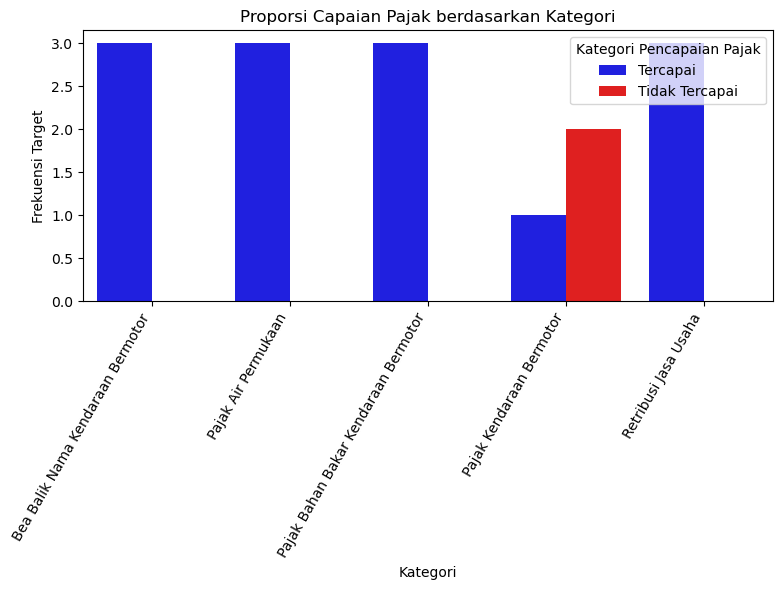

In [30]:
# Filter data hanya untuk sKategori yang "Tercapai" dan "Tidak Tercapai"
data_filtered = df2[df2['Kategori Pencapaian Pajak'].isin(['Tercapai', 'Tidak Tercapai'])]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data_filtered, x='label', hue='Kategori Pencapaian Pajak', palette=['blue', 'red'])
plt.xlabel('Kategori')
plt.ylabel('Frekuensi Target')
plt.title('Proporsi Capaian Pajak berdasarkan Kategori')
plt.legend(title='Kategori Pencapaian Pajak', labels=['Tercapai', 'Tidak Tercapai'])
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

## Interpretasi:
- Sebagian besar pencapaian penerimaan pajak berdasarkan Kategori sudah Tercapai, dan Terdapat salah satu pajak, yaitu Pajak Kendaraan Bermotor menjadi satu satunya pajak yang pencapaian penerimaan pajaknya belum tercapai

## Lanjutan Nomor 4 - Mendeteksi Outliers  

In [31]:
def deteksi_outlier_iqr(data):
    # Quartil 1 dan Quartil 3
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Menghitung IQR
    iqr = q3 - q1

    # Menghitung Batas atas dan Bawahnya
    batas_bawah = q1 - (1.5 * iqr)
    batas_atas = q3 + (1.5 * iqr)

    # Mengidentifikasi outlier
    outliers = [x for x in data if x < batas_bawah or x > batas_atas]
    # Jika x lebih kecil dari batas bawah atau lebih besar dari batas atas maka dianggap outlier
    return outliers


kolom_data = ['target', 'harilalu','jumlah', 'prosen', 'hrini','kurang']

for columns in kolom_data:
    data = df2[columns]
    outliers = deteksi_outlier_iqr(data)
    print(f"Outliers pada kolom {columns}: {outliers}\n")

Outliers pada kolom target: []

Outliers pada kolom harilalu: []

Outliers pada kolom jumlah: []

Outliers pada kolom prosen: [100.4190103234292, 90.0832244036502, 107.81415918789247, 97.39034174897378, 123.60812606880042, 113.03067657552475]

Outliers pada kolom hrini: [329714371.4285714, 526036374.28571427, 246733820.0, 385492673.0769231, 570180210.5769231, 268330803.84615386]

Outliers pada kolom kurang: [689433078025]



<AxesSubplot:>

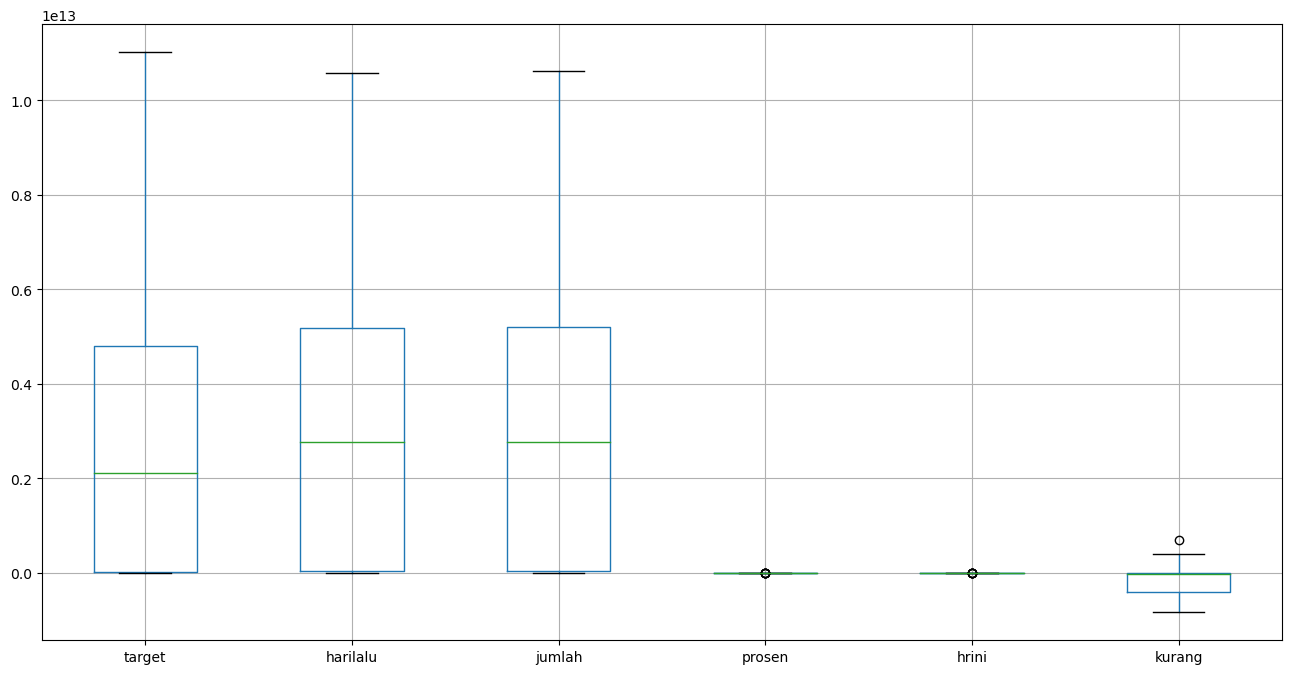

In [32]:
df2.boxplot(figsize=(16,8))

## Interpretasi: 
- Terdapat beberapa Kolom yang mempunyai Outliers, yaitu: 
1. Kolom Prosen
2. Kolom Hrini
3. Kolom Kurang
- Kolom yang tidak mempunyai outliers, yaitu:
1. Kolom Target
2. Kolom Hari lalu
3. Kolom Jumlah

## 6. Bagaimana Mengubah Data Kategorik menjadi bentuk yang mendukung untuk analisis data pajak tersebut?

In [33]:
df3 = df2.copy()

In [34]:
# Menambahkan kolom "Kategori Pajak Terpenuhi" dari Kolom 
df3['Kategori Pencapaian Pajak'] = df3.apply(lambda pajak: 'Tercapai' 
                                          if pajak['jumlah'] > pajak['target'] 
                                          else 'Tidak Tercapai', axis=1)
df3

,skt,label,periode_update,target,harilalu,jumlah,prosen,hrini,kurang,Kategori Pencapaian Pajak
2,BBNKB,Bea Balik Nama Kendaraan Bermotor,Oktober 2022,3245000000000,3243699727800,3253583230800,100.419010,3.297144e+08,-8583230800,Tercapai
5,PAP,Pajak Air Permukaan,Oktober 2022,30000000000,36534595057,36534595057,101.701560,3.313000e+08,-6534595057,Tercapai
8,PBBKB,Pajak Bahan Bakar Kendaraan Bermotor,Oktober 2022,2125000000000,2199831098621,2199831098621,101.701560,3.313000e+08,-74831098621,Tercapai
11,PKB,Pajak Kendaraan Bermotor,Oktober 2022,6790000000000,6082155648875,6100566921975,90.083224,5.260364e+08,689433078025,Tidak Tercapai
14,RJU,Retribusi Jasa Usaha,Oktober 2022,3025000000,3183138500,3205022200,101.701560,2.467338e+08,-180022200,Tercapai
1,BBNKB,Bea Balik Nama Kendaraan Bermotor,November 2022,5346600000000,5690538701400,5709590420400,107.814159,3.854927e+08,-362990420400,Tercapai
4,PAP,Pajak Air Permukaan,November 2022,41861400000,54872073107,54872073107,101.701560,3.313000e+08,-13010673107,Tercapai
7,PBBKB,Pajak Bahan Bakar Kendaraan Bermotor,November 2022,4250000000000,4681697197140,4681697197140,101.701560,3.313000e+08,-431697197140,Tercapai
10,PKB,Pajak Kendaraan Bermotor,November 2022,11012500000000,10581075711664,10610725082614,97.390342,5.701802e+08,401774917386,Tidak Tercapai
13,RJU,Retribusi Jasa Usaha,November 2022,4893500000,5401405000,5440006800,103.269735,2.683308e+08,-546506800,Tercapai


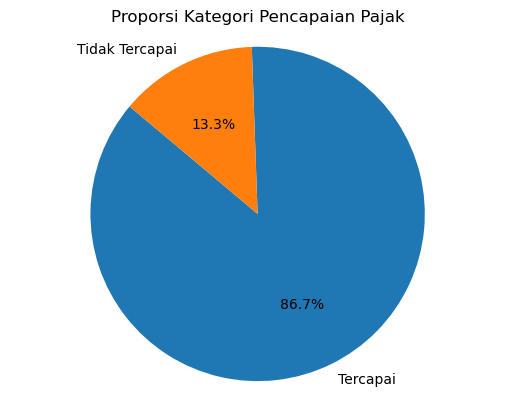

In [35]:
pencapaian_proporsi = df3['Kategori Pencapaian Pajak'].value_counts()

# Membuat pie chart
plt.pie(pencapaian_proporsi, labels=pencapaian_proporsi.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar pie chart menjadi lingkaran

plt.title('Proporsi Kategori Pencapaian Pajak')
plt.show()

## Interpretasi :
- Sebagian besar Proporsi Pencapaian Penerimaan Pajak sudah tercapai dengan nilai sebesar 86.7%, dan yang belum tercapai yaitu 13.3%

In [36]:
dummies = pd.get_dummies(df3['Kategori Pencapaian Pajak'], prefix = 'Kategori Pencapaian Pajak')
dummies

,Kategori Pencapaian Pajak_Tercapai,Kategori Pencapaian Pajak_Tidak Tercapai
2,1,0
5,1,0
8,1,0
11,0,1
14,1,0
1,1,0
4,1,0
7,1,0
10,0,1
13,1,0


In [37]:
with_dummy = df3[['target', 'jumlah']].join(dummies)
with_dummy

,target,jumlah,Kategori Pencapaian Pajak_Tercapai,Kategori Pencapaian Pajak_Tidak Tercapai
2,3245000000000,3253583230800,1,0
5,30000000000,36534595057,1,0
8,2125000000000,2199831098621,1,0
11,6790000000000,6100566921975,0,1
14,3025000000,3205022200,1,0
1,5346600000000,5709590420400,1,0
4,41861400000,54872073107,1,0
7,4250000000000,4681697197140,1,0
10,11012500000000,10610725082614,0,1
13,4893500000,5440006800,1,0


In [38]:
import statsmodels.api as sm
result = sm.OLS(endog = with_dummy['jumlah'], exog = with_dummy[['Kategori Pencapaian Pajak_Tercapai', 'Kategori Pencapaian Pajak_Tidak Tercapai']])
res = result.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 jumlah   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     9.000
Date:                Tue, 31 Oct 2023   Prob (F-statistic):             0.0102
Time:                        20:03:32   Log-Likelihood:                -449.25
No. Observations:                  15   AIC:                             902.5
Df Residuals:                      13   BIC:                             903.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Kategori Pencapaian Pajak_Tercapai        2.335e+12   7.33e+11      3.186      0.007    7.51e+11    3.92e+12
Kategori Pencapaian Pajak_Tidak Tercapai  8.356e+12   1.87e+12      4.472      0.001    4.32e+12    1.24e+13
==============================================================================
Omnibus:                        1.681   Durbin-Watson:                   2.718
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.322
Skew:                           0.584   Prob(JB):                        0.516
Kurtosis:                       2.133   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Kesimpulan:
- Dari data tersebut, dapat disimpulkan bahwa Sebagian Besar Pencapaian Penerimaan Pajak sudah tercapai dan itu menandakan bahwa masyarakat sudah cukup patuh dalam berkontribusi pembayaran pajak. Akan tetapi terdapat Satu pajak yang belum tercapai targetnya, yaitu Pajak Kendaraan Bermotor.

## Saran:
- Meningkatkan Kepatuhan Wajib Pajak dengan cara memperkuat sistem pemungutan pajak
- Meningkatkan kesadaran masyarakat tentang pentingnya membayar pajak dan kontribusi pajak khususnya pada Pajak Kendaraan Bermotor